<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Bienvenue</h4>
    asdfasdfhave <i>any</i> asdfasdf
</div>

## Imports

In [1]:
# This is a comment
# First we import built-in libraries
import random                  
from fractions import Fraction   

# Then some 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo

### MuseScore3 Windows

In [2]:
# Windows (adapt Program Files)
# musescore_executable = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'

# environment.set('musescoreDirectPNGPath', musescore_executable)
# environment.set('musicxmlPath', musescore_executable)
# environment.set('autoDownload', 'allow')

### MuseScore3 Mac

In [3]:
# Mac path
musescore_executable = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

# Tools

In [4]:
# random numbers
random.seed(0);

# function to return key for any value
def getKeyFromValue(_dictionnary, _value):
    for key, value in _dictionnary.items():
         if _value == value:
             return key
 
    return None; #doesn't exist

# Play

In [5]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play();

# Notes

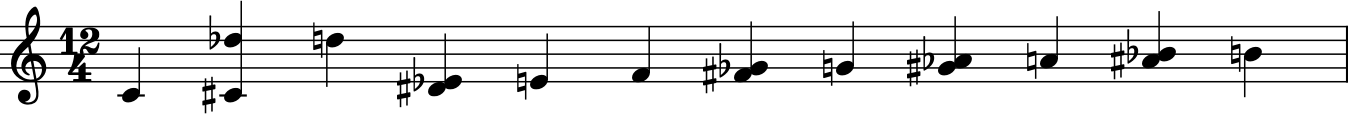

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
notes = [['C'], ['C#', 'Db5'], ['D5'], ['D#', 'Eb'], ['E'], ['F'], ['F#', 'Gb'], ['G'], ['G#','Ab'], ['A'], ['A#','Bb'], ['B']]
m = stream.Measure()
m.append([chord.Chord([note.Note(name) for name in pitch_class]) for pitch_class in notes]);

m.show();
play(m);

## Scales / Chords

In [7]:
def isSameNoteWithoutOctave(note1, note2):
    
    if note1.pitch.name == note2.pitch.name: 
        return True;
    
    # To lose the octave information
    n1 = note.Note(pitch = note1.pitch.name);
    n2 = note.Note(pitch = note2.pitch.name);
    
    if n1.pitch.frequency == n2.pitch.frequency:
        return True;
    
    return False;

In [8]:
d = note.Note("D#3");
e = note.Note("Eb5");

print(isSameNoteWithoutOctave(d,e));

True


### Scale

In [9]:
# Scales interval dictionnary
scalesIntervalDictionnary = {
  "major": [0,2,4,5,7,9,11],
  "minor": [0,2,3,5,7,8,10],
  "dorian": [0,3,7] ##
}

# Scale
class Scale:
    
    # Constructor
    def __init__(self, _baseNote = note.Note('C4'), _interval = scalesIntervalDictionnary["major"], _randomBase = False, _randomMinorMajorScale = False):
              
        if _randomBase == True:
            self.baseNote = note.Note(pitch = random.randint(0,11));
        else: 
            self.baseNote = _baseNote;
             
        if _randomMinorMajorScale == True:
            r = random.randint(0,1);
            if r == 1:
                self.interval = scalesIntervalDictionnary["major"];
            else:
                self.interval = scalesIntervalDictionnary["minor"];
        else:
            self.interval = _interval;
        
    
    # Transposes the base note (of i semi tones)
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    # Gets the ith tone of the scale
    def getTone(self, i):
        return self.baseNote.transpose(self.interval[(i-1)%len(self.interval)]);
    
    def isToneOnScale(self, note):
        for i in range(len(self.interval)):
           # print(self.baseTranspose(self.interval[i]).name)
            if isSameNoteWithoutOctave(self.baseTranspose(self.interval[i]), note):
                return True;
        return False;
    
    # Get notes
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval];
        return n;
    
    # Show
    def show(self):
        m = stream.Measure();
        m.append([self.baseNote.transpose(i) for i in self.interval]);     
        m.append(self.baseNote.transpose(12));
        m.show();

### Chord

In [10]:
# Chords type dictionnary
chordsDictionnary = {
  "": [0,4,7],
  "5": [0,7],
  "m": [0,3,7],
  "7": [0,4,7,10],
  "m7": [0,3,7,10]
}

# Chord
class Chord:
    
    # Constructor
    def __init__(self, _baseNote, _scale):

        self.baseNote = _baseNote;
        self.interval = [0]; # 1th and 5th
        
        if _scale.isToneOnScale(_baseNote.transpose(3)) == True:
            self.interval.append(3);
        elif _scale.isToneOnScale(_baseNote.transpose(4)) == True:           
            self.interval.append(4);
            
        self.interval.append(7);
        
        
        
    # Define (like a constructor)
    def defineByType(self, _baseNote, _type = ""):       
        self.baseNote = _baseNote;
        self.interval = chordsDictionnary[_type];
        
        
   # def __init__(self, *args, **kwargs):   
   #     #args -- tuple of anonymous arguments
        #kwargs -- dictionary of named arguments
     #   print ('args: ', args, ' kwargs: ', kwargs);
        
     #   self.baseNote = kwargs["_baseNote"];
        
     #   if kwargs.get("_scale") != None:
            
        
      #  print(kwargs.get("michel3"))
     #   print(kwargs.keys())
            
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    
    def getType(self):
        key = getKeyFromValue(chordsDictionnary, self.interval);
        if key != None:
            return key;
        return "Not in dictionnary";
    
    def getName(self):
        return self.baseNote.name + self.getType();
    
    # Major or minor chord
    #def isMajor(self):
        #if self.type.find("m") == -1:
       #     return True;
      #  return False;
    
    #def isMinor(self):
     #   return not self.isMajor();
    
    
    
    # only for scale ?
    #def getTone(self, i): # with i from 1 to 7.
        #minor = [0,2,3,5,7,8,10];
        #return self.baseTranspose(minor[(i-1)%7]);
        #return self.baseNote.transpose(self.scale.interval[(i-1)%7]);$
       # return note.Note(3)
    
    # Get notes
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval];
        return n;
    
    
    def getNotesWithOctave(self, _octave = 4):       
        n = [note.Note(pitch = self.baseNote.transpose(i).pitch.name, octave = _octave) for i in self.interval];
        return n;
    
    
    def getChordObject(self):
        return chord.Chord(self.getNotesWithOctave());
    
    # Show
    def show(self):
        self.getChordObject().show();
        
    def getText(self):
        return self.baseNote.pitch.name + " " + self.getType();
        
    def showText(self):
        print(self.getText());
    
    
    
    
    
    
    

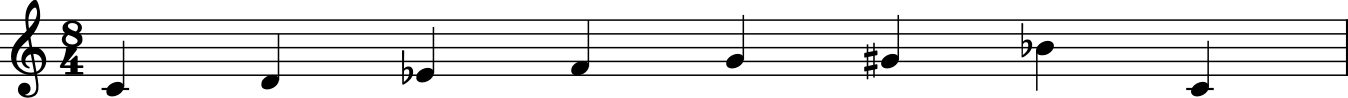

In [11]:
s = Scale(note.Note("C"), scalesIntervalDictionnary["minor"]);
s.show();

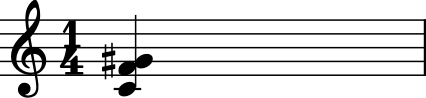

Fm
[0, 3, 7]
[<music21.note.Note F>, <music21.note.Note G#>, <music21.note.Note C>]
<music21.note.Note C>
C3
C
3
<music21.note.Note C>


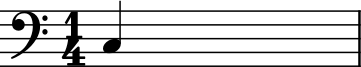

In [12]:
c = Chord(_baseNote = note.Note("F"), _scale = s);
c.show();
print(c.getName());
print(c.interval)
print(c.getNotesWithOctave())


a = [0,3,7];
[note.Note(pitch = note.Note("C").transpose(i).pitch, octave = 1) for i in a]

n = note.Note(pitch = note.Note("C").pitch.name, octave = 3)
#n = note.Note(pitch = note.Note("C").transpose(i).pitch.name, octave = 3)
print(n)
print(n.pitch)
print(n.pitch.name)
print(n.pitch.octave)


bassNote = note.Note(pitch = "C", octave = 3);
print(bassNote)
bassNote.show()


## NotesRange

In [13]:
class NotesRange:
    
    # Constructor
    def __init__(self, _octaveNumber = 8):  
        
        self.range = {}; # Dictionnary
        for o in range(_octaveNumber):
            for i in range(0,12):
                n = note.Note(pitch = i);
                self.range[n.pitch.name + str(o)] = 0;   
        
        self.range["C" + str(o+1)] = 0; # highest C
                
                
    # Add chance/probability to notes (without octave) 
    # if _probability is empty, then all notes' probability will be increased by 1 
    def addChanceToNotesWithoutOctave(self, _notes = [], _probabilities = [], _probability = 1):
        
        if len(_notes) != 0 and len(_probabilities) < len(_notes):
            _probabilities = [_probability for i in _notes];
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] += _probabilities[x];
        return;
    
    
    def multiplyChanceToNotesWithoutOctave(self, _notes = [], _probabilities = [], _probability = 1):
        
        if len(_notes) != 0 and len(_probabilities) < len(_notes):
            _probabilities = [_probability for i in _notes];
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] *= _probabilities[x];
        return;
    
    
    #NEW. 0 is the _zeroNote and then +1 for the next note etc, 12 is the distance for an octave
    def multiplyByFunction(self, _function, _zeroNote = note.Note("C4")):              
        keysLength = len(self.range.keys());
        for key in self.range.keys():             
            x = note.Note(key).pitch.midi - _zeroNote.pitch.midi;                     
            #print(key + "  " + str(x) + " f(x): " + str(_function(x)))
            self.range[key] *= _function(x);   
            
    # Add a function to the NotesRange  
    def addFunction(self, _function, _zeroNote = note.Note("C4")):
              
        keysLength = len(self.range.keys());
        for key in self.range.keys():             
            x = note.Note(key).pitch.midi - _zeroNote.pitch.midi;                     
            self.range[key] += _function(x); 
    
    # Add another NotesRange
    def addNotesRange(self, _noteRange):
        for key in self.range.keys():      
            self.range[key] += _noteRange.range[key];   
            
            
    def pickRandomNote(self):
        totalProbability = 0;
        for key in self.range.keys(): 
            totalProbability += self.range[key];
        
        r = random.randint(1,totalProbability);
        print(str(totalProbability) +"  " + str(r));
        
        counter = 0;
        for key in self.range.keys():
            counter += self.range[key];
            if counter >= r:
                return note.Note(key);          
        return None; # empty notesRange
    
    # Show 
    def show(self):
        txt = "{ ";
        for key in self.range.keys():
            value = self.range[key];
            if value != 0:
                txt += key + ": " + str(value) + ", ";
        print(txt[:-2] + " }");
        
    def showFull(self):
        print(self.range);
        
    # Show Plot
    def showPlot(self):
        keys = self.range.keys();
        values = self.range.values();
        plt.bar(keys, values);

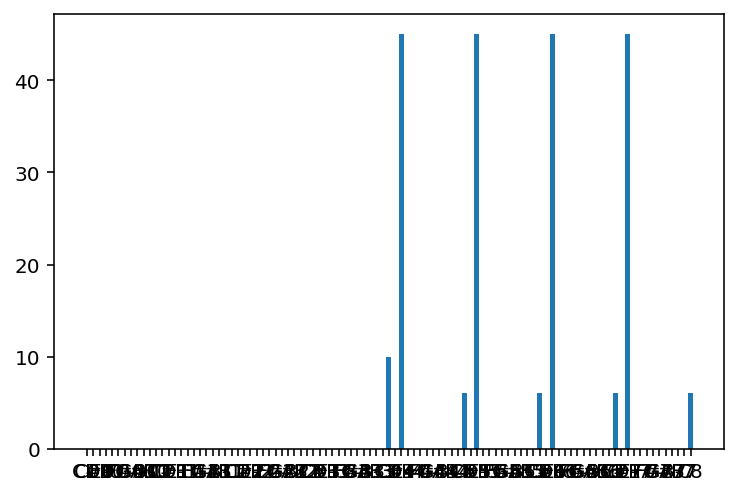

In [14]:
# NotesRange test

nr = NotesRange();

nr.addChanceToNotesWithoutOctave([note.Note("C"),note.Note("D")], [2,15]);


def ff(x): 
    if x < 0:
        return 0;
    if x == 0:
        return 5;
    return 3;


nr.multiplyByFunction(ff);
nr.showPlot();

### Bass test 1

<music21.note.Note A> [0, 2, 3, 5, 7, 8, 10]


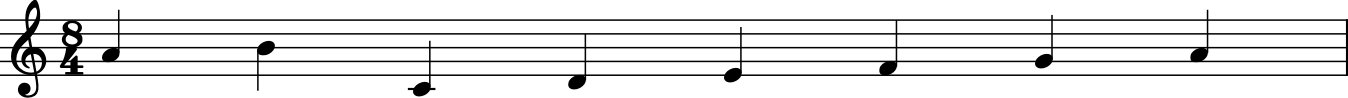

minor


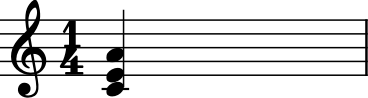

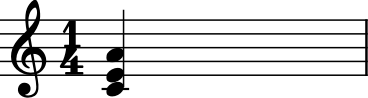

24  20
ici
<music21.note.Note E>


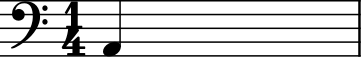

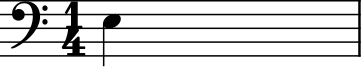

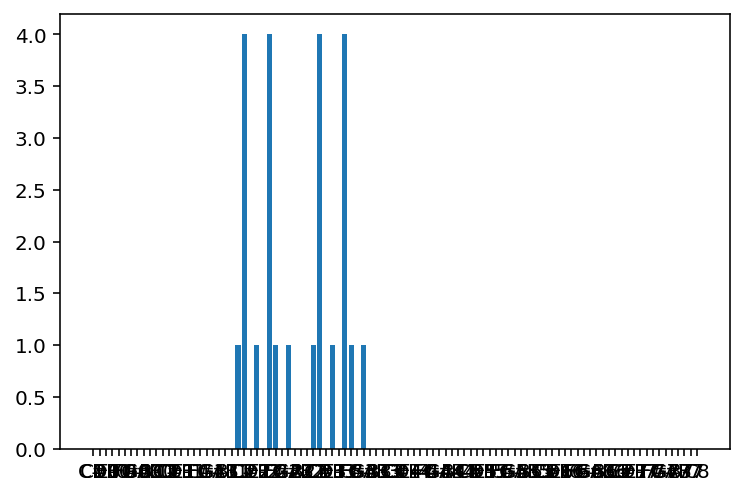

In [15]:
### Random scale
#s = Scale(_randomBase = True, _randomMinorMajorScale = True);
s = Scale(note.Note("A"), scalesIntervalDictionnary["minor"])
print(s.baseNote, s.interval)
s.show();

if s.isToneOnScale(s.baseTranspose(3)) == True:
    print("minor")
else:
    print("major")
        

bassNote = note.Note(pitch = s.baseNote.pitch.name, octave = 2); # A2
        
c1 = Chord(bassNote, s);
c1.show();

m = stream.Measure();
m.append(c1.getChordObject());
m.show();
play(m);
        
nr = NotesRange();
nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave());
#nr.showPlot();

nr.addChanceToNotesWithoutOctave(c1.getNotesWithoutOctave(), _probability = 3)

nr.multiplyChanceToNotesWithoutOctave([bassNote], _probability = 0); #avoir playing the bass again / optionnal ?

#nr.showPlot();

c1.getNotesWithoutOctave()


def gauss(x):
    if x < 12 and x > -12:
        return 1;
    return 0;

nr.multiplyByFunction(gauss, bassNote);
nr.showPlot();

bassNote2 = nr.pickRandomNote();
print("ici")
print(bassNote2)
bassNote.show();
bassNote2.show();

### Bass test 2

Scale: minor <music21.note.Note A> [0, 2, 3, 5, 7, 8, 10]


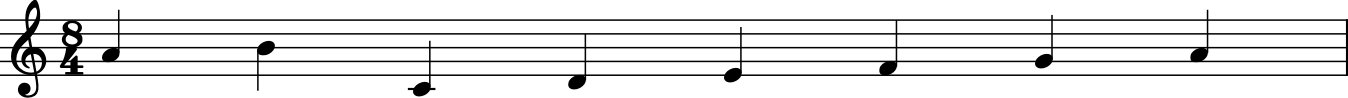


NotesRange:
{ D2: 1, E2: 3, F2: 1, G2: 1, B2: 1, C3: 3 }
10  2
{ D2: 1, F2: 1, G2: 3, A2: 1, B2: 3, C3: 1 }
10  2
{ D2: 1, E2: 1, G2: 1, A2: 3, B2: 1, C3: 3 }
10  6
{ D2: 1, E2: 3, F2: 1, G2: 1, B2: 1, C3: 3 }
10  8
{ D2: 1, E2: 3, F2: 1, G2: 3, A2: 1, B2: 1 }
10  9
{ D2: 1, E2: 3, F2: 1, G2: 1, B2: 1, C3: 3 }
10  2
{ D2: 1, F2: 1, G2: 3, A2: 1, B2: 3, C3: 1 }
10  6
{ D2: 1, E2: 3, F2: 1, G2: 1, B2: 1, C3: 3 }
10  7

Chords:
0 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
1 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]
2 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
3 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
4 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
5 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
6 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]
7 A m [<music21.note.Note A>, <music21.n

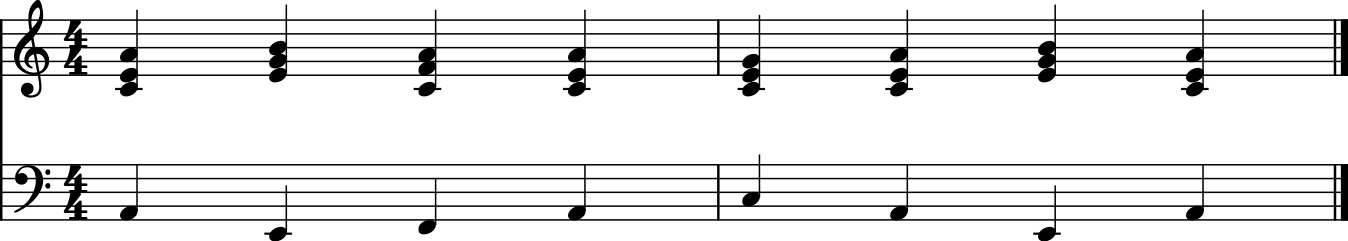

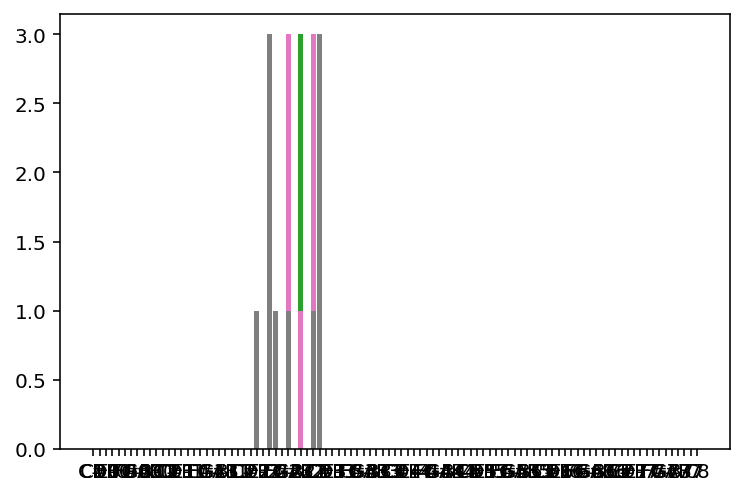

In [16]:
### Random scale
#s = Scale(_randomBase = True, _randomMinorMajorScale = True);
s = Scale(note.Note("A"), scalesIntervalDictionnary["minor"]);


scaleType = "minor";
if s.isToneOnScale(s.baseTranspose(3)) == False:
    print("minor")
print("Scale:", scaleType, s.baseNote, s.interval);
s.show();

# --> in tools !  $$ give 6 as parameter possible ? $$
def gauss(x):
    if x <= 6 and x > -6: # >= and > to exactly have one octave
        return 1;
    return 0;


# input
octaveRegion = 2;
nbr = 8;
bassNotes = [];  # stores music21's note.Note()
bassChords = []; # stores Chord objects

bassNotes.append(note.Note(pitch = s.baseNote.pitch.name, octave = octaveRegion)); # bassNotes[0]
bassChords.append(Chord(bassNotes[0], s));                                         # bassChords[0]

print("\nNotesRange:")
for i in range(nbr): 
    nr = NotesRange();
    nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave()); # notes of the scale
    nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
    nr.multiplyChanceToNotesWithoutOctave([bassNotes[i]], _probability = 0); # avoir playing the same bassNotes[i] again
    nr.multiplyByFunction(gauss, note.Note(pitch = 6, octave = octaveRegion)); # range, to stay in the octaveRegion
        
    nr.showPlot();
    nr.show();
    bassNotes.append(nr.pickRandomNote());     #bassNotes[i+1]
    bassChords.append(Chord(bassNotes[i+1], s)); #bassChords[i+1]
    

print("\nChords:")
score = stream.Score()

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);

score.show();
play(score);

# Rhythm section

In [17]:
import random
from music21 import midi, note, stream, instrument, meter, key
import nltk
import mchmm
from fractions import Fraction

# Rhythm generation

In [18]:
def create_percussion(time_sig = None):
    if time_sig == None:
        drumPart = stream.Measure()
    else:
        drumPart = stream.Stream()
        drumPart.timeSignature = meter.TimeSignature(time_sig)
    
    drumPart.insert(0, instrument.TomTom())
    return drumPart

def append_event(duration, original_stream, rest = False, pitch = "C4"):
    new_stream = original_stream
    if rest:
        new_stream.append(note.Rest(quarterLength = duration*4))
    else:
        new_stream.append(note.Note(pitch, quarterLength = duration/4))
                          
    return new_stream

def rhythm_from_sequence(durations, time_sig = None, pitch = 'C4', rhythm=None):
    if rhythm is None:
        rhythm = create_percussion(time_sig = time_sig)
                          
    for dur in durations:
        is_rest = False
        if dur != 0:
            if dur < 1:
                is_rest = True
                dur = Fraction(dur)
            
            rhythm = append_event(dur, rhythm, rest = is_rest, pitch = pitch) 
    return rhythm

# Play the rhythm

In [19]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

# The tree

In [20]:
def findCeil(arr, r, l, h) :
 
    while (l < h) :   
        mid = l + ((h - l) >> 1);
        if r > arr[mid] :
            l = mid + 1
        else :
            h = mid
     
    if arr[l] >= r:
        return l
    else :
        return -1
 
def myRand(arr, freq, n):
    prefix = [0] * n
    prefix[0] = freq[0]
    for i in range(n):
        prefix[i] = prefix[i - 1] + freq[i]

    r = random.randint(0, prefix[n - 1]) + 1
    
    indexc = findCeil(prefix, r, 0, n - 1)
    return arr[indexc]
    
def generate_random_tree(arr=[], freq=[], n_arr=0, nodelist=[], idx=0, parent=None, 
                         depth=0, max_children=4, max_depth=4):
    if 0 <= depth < max_depth:
        n = random.randint(1, max_children)
        nodelist.extend([[idx+i, parent, depth, myRand(arr, freq, n_arr)] for i in range(n)])  

        [generate_random_tree(arr, freq, n_arr, nodelist, len(nodelist), idx+i, depth+1, max_children, max_depth) 
                              for i in range(n)]

    elif depth == max_depth:
        n = random.randint(0, max_children)
        nodelist.extend([[idx+i, parent, depth, myRand(arr, freq, n_arr)] for i in range(n)])  
        return
#Build a list of nodes in a random tree up to a maximum depth.
    #:param:    nodelist     list, the nodes in the tree; each node is a list with elements [idx, parent, depth]
    #:param:    idx          int, the index of a node
    #:param:    parent       int, the index of the node's parent
    #:param:    depth        int, the distance of a node from the root
    #:param:    max_children int, the maximum number of children a node can have
    #:param:    max_depth    int, the maximum distance from the tree to the root"""
     
def get_path():
    tree = [[0, None, 0, 1]]
    generate_random_tree(arr, freq, n_arr, nodelist=tree, idx=len(tree), parent=0, 
                         depth=1, max_children=3, max_depth=10)

    parent = 0
    path = []
    child = []
    children = 0

    while children == 0:
        children = 1

        for x in range(len(tree)):
            if tree[x][1] == parent: #on a trouvé des enfants
                child.append(tree[x][0])
                children = 0
        if child:
            rdm = child[random.randint(0, len(child)-1)]
            path.append(tree[rdm][3])
            parent = tree[rdm][0]
    
    return path;

 #---------------------------------------------------------------------------------------------------

### Constants
    
# 16:ronde, 8:blanche, 4:noire, 2:croche, 1:double croche
# 1/2:demi pause, 1/4:soupir, 1/8:demi soupir

arr = [1, 2, 4, 8, 16, 1/2, 1/4, 1/8]; 
freq = [5, 50, 30, 20, 10, 3, 2, 1];

random.seed(0)
n_arr = len(arr)

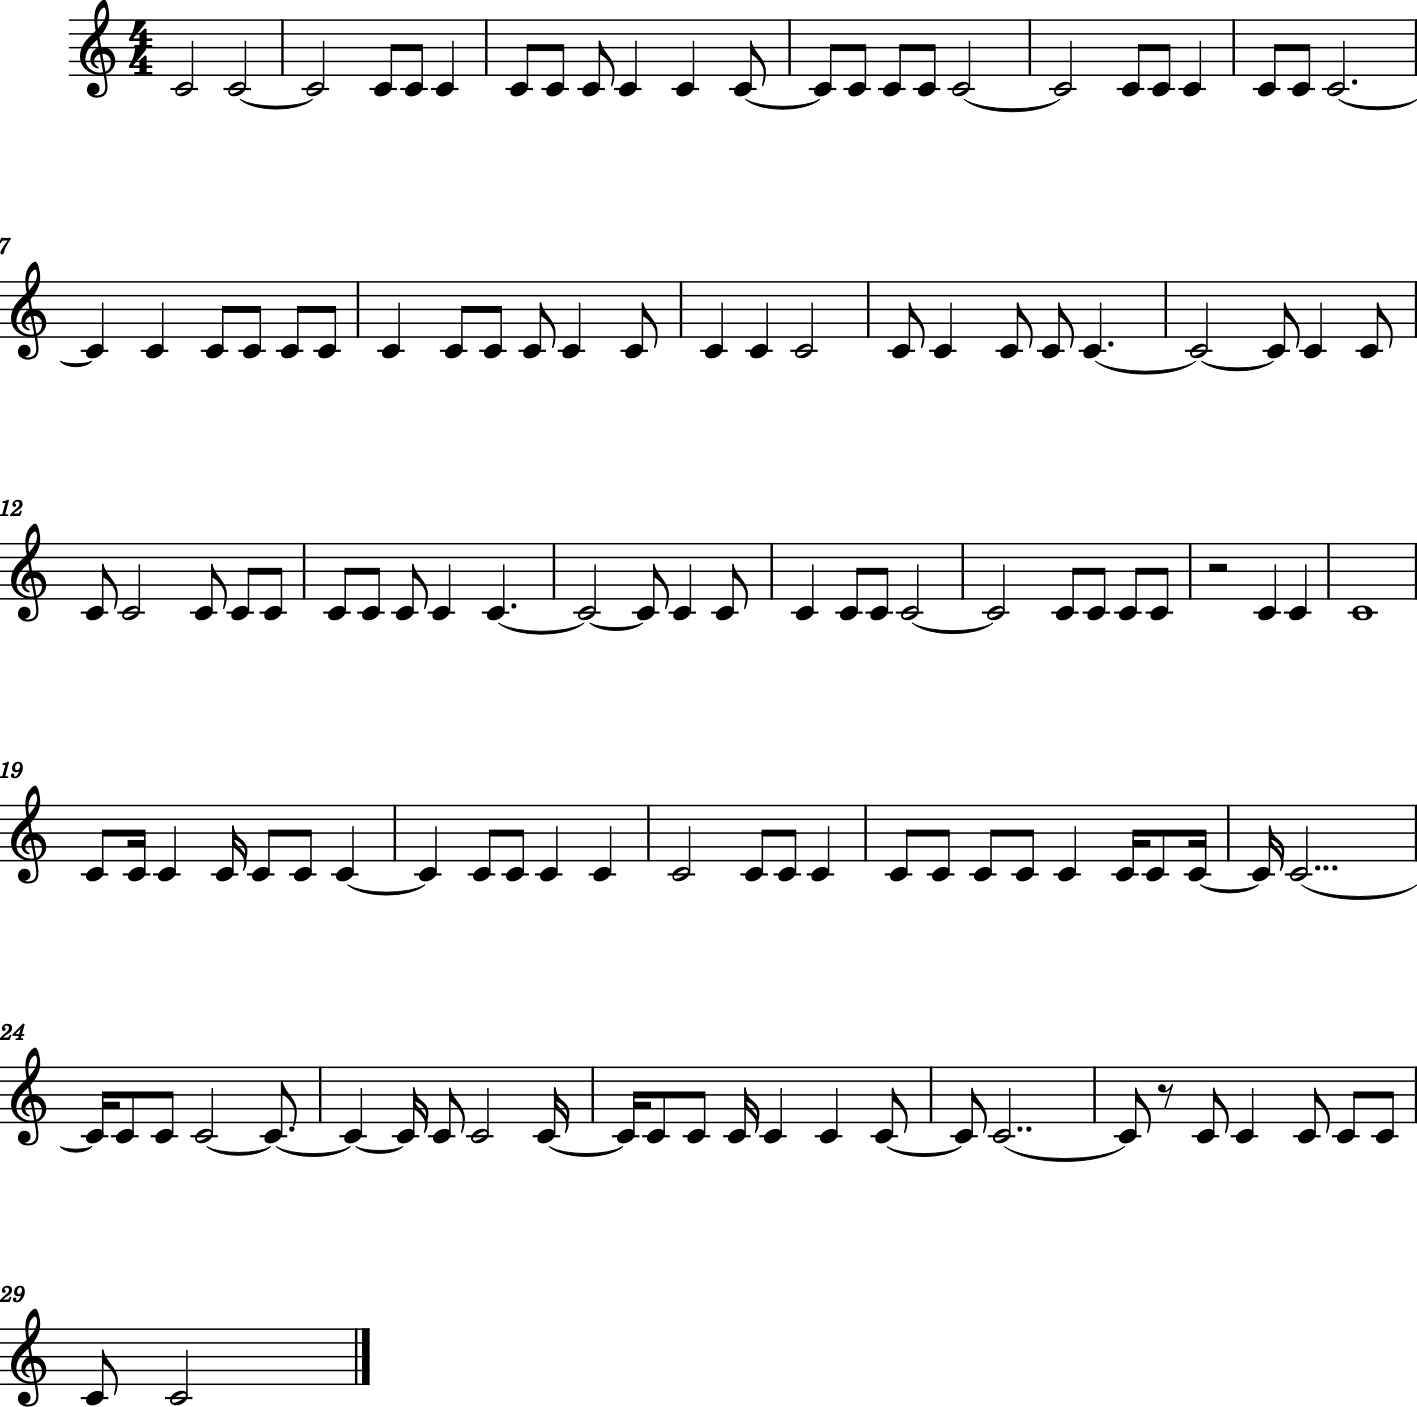

In [21]:
path = get_path();
path_rhythm = create_percussion(time_sig = '4/4')
path_rhythm = rhythm_from_sequence(path, rhythm=path_rhythm)
path_rhythm.show()

In [22]:
#play(path_rhythm)